# FriendFeed Data Preprocessing for Community Detection

This notebook preprocesses the FriendFeed social network dataset to prepare it for community detection analysis. It includes data loading, cleaning, exploration, and visualization steps.

## Dataset Information

**DATASET**: FriendFeed (Version 2)

- **SNS**: FriendFeed (www.friendfeed.com - no longer active)
- **Monitoring period**: August 1, 2010 to September 30, 2010
- **Monitoring tool**: Custom Java script

Please cite: Fabio Celli, F. Marta L. Di Lascio, Matteo Magnani, Barbara Pacelli, and Luca Rossi. *Social network data and practices: the case of FriendFeed*. In International Conference on Social Computing, Behavioral Modeling and Prediction, Lecture Notes in Computer Science. Springer, Berlin, 2010.

### Data Files and Fields:

- **Entries[123] (.csv)**
    - **PostID**: Identifier of the entry, assigned by FriendFeed.
    - **PostedBy**: Identifier of the author of the post.
    - **SourceName**: If present, external source of the entry, e.g., Twitter or Facebook.
    - **SourceURL**: Address of the source of the post.
    - **GeoX**, **GeoY**: Empty fields.
    - **Timestamp**: Timestamp of posting, GMT+1.
    - **Text**: Body of the message.
    - **NumImg**: Number of images.
    - **ImgURL**: URLs of images.
    - **NumVid**: Number of videos.
    - **VidURL**: URLs of videos.
- **Comments (.csv)**
    - Similar fields as Entries.
- **Likes (.csv)**
    - **userID**: ID of the user liking the entry.
    - **PostID**: ID of the entry which received this like.
    - **Timestamp**: Timestamp of action, GMT+1.
- **Users (.csv)**
    - **ID**: Identifier of the user, assigned by FriendFeed.
    - **Type**: User or group.
    - **Name**: Display name.
    - **Description**: A textual self-description of the user.
- **Following (.csv)**
    - **FollowerID**: ID of the user following.
    - **FollowedID**: ID of the user being followed.
    - **Timestamp**: Timestamp of action, GMT+1.
- **Services (.csv)**
    - **UserID**: ID in FriendFeed.
    - **ServiceID**: Internal name for the service, e.g., googlereader.
    - **ServiceURL**: Home of the service.
- **Subscriptions (.csv)**
    - **FollowerID**: ID of the user subscribing.
    - **FollowedID**: ID of the user being subscribed to.

## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid', context='notebook')

## 2. Load Data

In [2]:
# Define column names for each dataset
users_col_names = ['ID', 'Type', 'Name', 'Reserved field', 'Description']
subscriptions_col_names = ['FollowerID', 'FollowedID']
services_col_names = ['UserID', 'ServiceID', 'ServiceName', 'ServiceURL', 'UserNameOnService', 'UserURLOnService']
likes_col_names = ['userID', 'PostID', 'Timestamp']
following_col_names = ['FollowerID', 'FollowedID', 'Timestamp']
comments_col_names = ['PostID', 'EntryID', 'PostedBy', 'SourceName', 'SourceURL', 'GeoX', 'GeoY', 'Timestamp', 'Text', 'NumImg', 'ImgURL', 'NumVid', 'VidURL']
entries_col_names = ['PostID', 'PostedBy', 'SourceName', 'SourceURL', 'GeoX', 'GeoY', 'Timestamp', 'Text', 'NumImg', 'ImgURL', 'NumVid', 'VidURL']

# Load datasets
users = pd.read_csv('raw_data/users.csv', sep='|', on_bad_lines='skip', names=users_col_names)
subs = pd.read_csv('raw_data/subscriptions.csv', sep=',', on_bad_lines='skip', names=subscriptions_col_names)
services = pd.read_csv('raw_data/services.csv', sep='|', on_bad_lines='skip', names=services_col_names)
likes = pd.read_csv('raw_data/likes.csv', sep='\t', on_bad_lines='skip', names=likes_col_names)
following = pd.read_csv('raw_data/followingAugSept.csv', sep='\t', on_bad_lines='skip', names=following_col_names)
comments = pd.read_csv('raw_data/commentAugSept.csv', sep='\t', on_bad_lines='skip', names=comments_col_names)
entries1 = pd.read_csv('raw_data/entries1.csv', sep='\t', on_bad_lines='skip', names=entries_col_names)
entries2 = pd.read_csv('raw_data/entries2.csv', sep='\t', on_bad_lines='skip', names=entries_col_names)
entries3 = pd.read_csv('raw_data/entries3.csv', sep='\t', on_bad_lines='skip', names=entries_col_names)

# Concatenate entries datasets
entries = pd.concat([entries1, entries2, entries3], ignore_index=True)

In [3]:
import pandas as pd

def display_info_as_table(df, df_name):
    # Get basic info about the dataframe
    info = {
         df_name: df.columns,
        "Non-Null Count": df.count().values,
        "Data Type": df.dtypes.values
    }
    
    # Create a DataFrame from the dictionary
    info_df = pd.DataFrame(info)
    
    # Display the DataFrame (here we're assuming you're in Jupyter or similar environment)
    print(f"Information about {df_name}:")
    display(info_df)

# Assuming you have pandas DataFrames for each dataset
# Replace `your_dataframe` with your actual DataFrame variables
display_info_as_table(users, "Users")
display_info_as_table(subs, "Subscriptions")
display_info_as_table(services, "Services")
display_info_as_table(likes, "Likes")
display_info_as_table(following, "Following")
display_info_as_table(comments, "Comments")
display_info_as_table(entries, "Entries")






Information about Users:


,Users,Non-Null Count,Data Type
0,ID,665382,object
1,Type,665382,object
2,Name,665376,object
3,Reserved field,665376,object
4,Description,172177,object


Information about Subscriptions:


,Subscriptions,Non-Null Count,Data Type
0,FollowerID,27811816,object
1,FollowedID,27811816,object


Information about Services:


,Services,Non-Null Count,Data Type
0,UserID,1587285,object
1,ServiceID,1587283,object
2,ServiceName,1587278,object
3,ServiceURL,1587278,object
4,UserNameOnService,891640,object
5,UserURLOnService,1515837,object


Information about Likes:


,Likes,Non-Null Count,Data Type
0,userID,798112,object
1,PostID,798112,object
2,Timestamp,798112,object


Information about Following:


,Following,Non-Null Count,Data Type
0,FollowerID,19547158,object
1,FollowedID,19547158,object
2,Timestamp,19547158,object


Information about Comments:


,Comments,Non-Null Count,Data Type
0,PostID,3749891,object
1,EntryID,3749891,object
2,PostedBy,3749891,object
3,SourceName,401556,object
4,SourceURL,401556,object
5,GeoX,3749891,object
6,GeoY,3749891,object
7,Timestamp,3749891,object
8,Text,3749880,object
9,NumImg,0,float64


Information about Entries:


,Entries,Non-Null Count,Data Type
0,PostID,12450658,object
1,PostedBy,12450658,object
2,SourceName,11413895,object
3,SourceURL,11413895,object
4,GeoX,12450572,object
5,GeoY,12450658,object
6,Timestamp,12450569,object
7,Text,12450559,object
8,NumImg,12450569,float64
9,ImgURL,967598,object


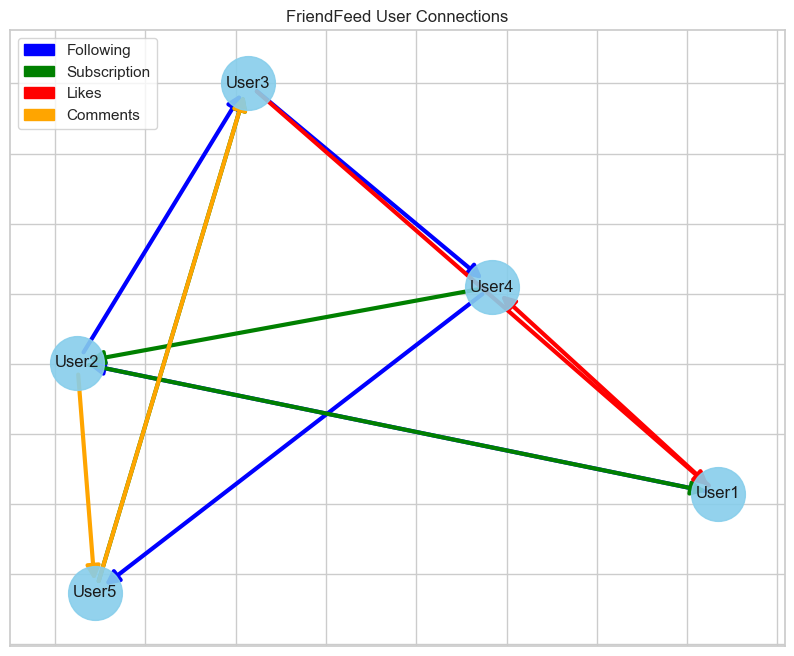

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def create_final_friendfeed_graph():
    # Create a directed graph
    G = nx.DiGraph()

    # Add users as nodes (Example user IDs)
    users = ['User1', 'User2', 'User3', 'User4', 'User5']

    # Add nodes for users
    G.add_nodes_from(users)

    # Define relationships (following, subscriptions, likes, comments)
    following_edges = [('User1', 'User2'), ('User2', 'User3'), ('User3', 'User4'), ('User4', 'User5')]
    subscription_edges = [('User2', 'User1'), ('User4', 'User2'), ('User5', 'User3')]
    likes_edges = [('User3', 'User1'), ('User1', 'User4')]
    comment_edges = [('User5', 'User3'), ('User2', 'User5')]

    # Add edges to the graph
    G.add_edges_from(following_edges, label='following')
    G.add_edges_from(subscription_edges, label='subscription')
    G.add_edges_from(likes_edges, label='likes')
    G.add_edges_from(comment_edges, label='comments')

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=1)  # positions for all nodes

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="skyblue", alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw edges with thicker lines for better visibility
    nx.draw_networkx_edges(G, pos, edgelist=following_edges, edge_color='blue', width=3, arrowsize=20)
    nx.draw_networkx_edges(G, pos, edgelist=subscription_edges, edge_color='green', width=3, arrowsize=20)
    nx.draw_networkx_edges(G, pos, edgelist=likes_edges, edge_color='red', width=3, arrowsize=20)
    nx.draw_networkx_edges(G, pos, edgelist=comment_edges, edge_color='orange', width=3, arrowsize=20)

    # Create a manual legend with patches to represent edge types
    blue_patch = mpatches.Patch(color='blue', label='Following')
    green_patch = mpatches.Patch(color='green', label='Subscription')
    red_patch = mpatches.Patch(color='red', label='Likes')
    orange_patch = mpatches.Patch(color='orange', label='Comments')
    plt.legend(handles=[blue_patch, green_patch, red_patch, orange_patch], loc='upper left')

    plt.title("FriendFeed User Connections")
    plt.show()

# Run the function to create and display the final graph
create_final_friendfeed_graph()



## 3. Data Exploration

### 3.1 Data Overview

In [5]:
# Display the first few rows of each dataset
datasets = {'Users': users, 'Subs': subs, 'Services': services, 'Likes': likes, 'Following': following, 'Comments': comments, 'Entries': entries}

for name, df in datasets.items():
    print(f"\n{name} dataset:\n")
    display(df.head())


Users dataset:



,ID,Type,Name,Reserved field,Description
0,2gwsk,user,Ming Quek,2a9209ad,NaN
1,iroach,user,Isaac Roach,20948a19,NaN
2,tonybraun,user,Tony Braun,f68e8b26,NaN
3,junknajidyahoocom1,user,Junknajid Yahoocom,98a02bb6,NaN
4,spaceastronautics,user,Space & Astronautics News,c3178cfa,"NASA, ESA, NOAA, USGS, astronomy, space, weath..."



Subs dataset:



,FollowerID,FollowedID
0,seoptimise,2gwsk
1,xahac,2gwsk
2,kmorrison,iroach
3,seoptimise,iroach
4,skyje,iroach



Services dataset:



,UserID,ServiceID,ServiceName,ServiceURL,UserNameOnService,UserURLOnService
0,2gwsk,blog,Blog,http://en.wikipedia.org/wiki/Blog,NaN,http://2gwsk.wordpress.com
1,2gwsk,twitter,Twitter,http://twitter.com/,2gwsk,http://twitter.com/2gwsk
2,iroach,facebook,Facebook,http://www.facebook.com/,NaN,http://www.facebook.com/profile.php?id=688384411
3,iroach,googletalk,Gmail/Google Talk,http://talk.google.com/,NaN,NaN
4,iroach,twitter,Twitter,http://twitter.com/,iroach,http://twitter.com/iroach



Likes dataset:



,userID,PostID,Timestamp
0,yasinde,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-04-28 07:17:43
1,socialnewsturkey,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 20:10:02
2,janzu,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 19:50:57
3,mugecerman,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 19:18:38
4,miocaro,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 17:31:31



Following dataset:



,FollowerID,FollowedID,Timestamp
0,njsinc4el,brendafranzo,2010-08-01 16:21:37.562726
1,njsinc4el,praguebob,2010-08-01 16:21:37.565893
2,zachhwilliams,hungheroic,2010-08-01 16:21:37.779807
3,zachhwilliams,ridwan2906,2010-08-01 16:21:37.780406
4,zachhwilliams,nickcodipietro,2010-08-01 16:21:37.780894



Comments dataset:



,PostID,EntryID,PostedBy,SourceName,SourceURL,GeoX,GeoY,Timestamp,Text,NumImg,ImgURL,NumVid,VidURL
0,e/ed12adf025b5491da54c4ff2c8c5377a/c/c2dbc8151...,e/ed12adf025b5491da54c4ff2c8c5377a,koenigdublin,NaN,NaN,\N,\N,2010-08-06 15:06:32,В начале 20 века было противостояние идеологи...,NaN,NaN,NaN,NaN
1,e/7f6fb13b5a99449bb9dcbb3f8693be73/c/7477fb677...,e/7f6fb13b5a99449bb9dcbb3f8693be73,ilportalinux,NaN,NaN,\N,\N,2010-08-06 15:06:32,sofferenza? :D,NaN,NaN,NaN,NaN
2,e/624ca9226b6526ebdb69f9b46df482c7/c/32c6bf5bc...,e/624ca9226b6526ebdb69f9b46df482c7,guardianuk,NaN,NaN,\N,\N,2010-08-06 14:45:07,Reel Review video: Catherine Shoard defends Kn...,NaN,NaN,NaN,NaN
3,e/2fdf59e075094fe1847137af34eda0f7/c/eb22afe81...,e/2fdf59e075094fe1847137af34eda0f7,nahi,m.ctor.org,http://m.ctor.org/f2p/,\N,\N,2010-08-06 15:06:32,VMWareじゃなくてVMwareね。,NaN,NaN,NaN,NaN
4,e/4d8de05f989d43a4b90bfbfc59751e1c/c/d472f7b81...,e/4d8de05f989d43a4b90bfbfc59751e1c,miocaro,NaN,NaN,\N,\N,2010-08-06 15:06:31,Anıl havuzdan uzak dur. Sen evde olacaksın :),NaN,NaN,NaN,NaN



Entries dataset:



,PostID,PostedBy,SourceName,SourceURL,GeoX,GeoY,Timestamp,Text,NumImg,ImgURL,NumVid,VidURL
0,e/29af803d670fb8d67692095f3ee623e6,newsroom1,Ottawa Citizen - News,http://www.ottawacitizen.com/index.html,\N,\N,2010-08-02 18:43:10,RIM 'will not compromise' BlackBerry security ...,1.0,http://www.ottawacitizen.com/will+compromise+...,0.0,NaN
1,e/9c8413a376bec6389be4d46d0812c2bb,mehmetinnet,Mehmetin.Net,http://www.mehmetin.net,\N,\N,2010-08-02 19:15:52,Fethullah Gülen: Referandum siyasî olarak görü...,1.0,http://www.mehmetin.net/2010/08/fethullah-gul...,0.0,NaN
2,e/2d658d97842a466a9513f587f85b0e59,mehmetergin,Mehmetin.Net,http://www.mehmetin.net/,\N,\N,2010-08-02 19:15:52,Fethullah Gülen: Referandum siyasî olarak görü...,1.0,http://www.mehmetin.net/2010/08/fethullah-gul...,0.0,NaN
3,e/b269ab5d56be4e5e90c1954ecc1ef63a,afriki,NaN,NaN,\N,\N,2010-08-02 16:37:57,Мне тут недавно один дизайнер сказал: «Ну прот...,0.0,NaN,0.0,NaN
4,e/74f0a50c374a4ad6bddcbcc60c60cad9,hamsafar,NaN,NaN,\N,\N,2010-08-02 18:54:39,عرض سلام و خسته نباشيد:),0.0,NaN,0.0,NaN


### 3.2 Missing Data Analysis

In [6]:
# Function to display missing data summary for each column in a dataset
def missing_data_summary(df, df_name):
    null_counts = df.isnull().sum()
    total_nulls = null_counts.sum()
    if total_nulls > 0:
        print(f"\n{df_name} has {total_nulls} total null values:")
        display(null_counts[null_counts > 0].sort_values(ascending=False))
    else:
        print(f"\n{df_name} has no null values.")

# Check for null values in each dataset
for name, df in datasets.items():
    missing_data_summary(df, name)



Users has 493217 total null values:


Description       493205
Name                   6
Reserved field         6
dtype: int64


Subs has no null values.

Services has 767139 total null values:


UserNameOnService    695650
UserURLOnService      71453
ServiceName              12
ServiceURL               12
ServiceID                 7
UserID                    5
dtype: int64


Likes has no null values.

Following has no null values.

Comments has 21696245 total null values:


NumImg        3749891
ImgURL        3749891
NumVid        3749891
VidURL        3749891
SourceName    3348335
SourceURL     3348335
Text               11
dtype: int64


Entries has 25819885 total null values:


VidURL        12262847
ImgURL        11483060
SourceName     1036763
SourceURL      1036763
Text                99
Timestamp           89
NumImg              89
NumVid              89
GeoX                86
dtype: int64

### 3.3 Data Types and Conversion

In [7]:
# Check data types and convert IDs to strings
id_columns = {
    'users': ['ID'],
    'subs': ['FollowerID', 'FollowedID'],
    'services': ['UserID'],
    'likes': ['userID', 'PostID'],
    'following': ['FollowerID', 'FollowedID'],
    'comments': ['PostID', 'EntryID', 'PostedBy'],
    'entries': ['PostID', 'PostedBy']
}

for name, columns in id_columns.items():
    for column in columns:
        datasets[name.capitalize()][column] = datasets[name.capitalize()][column].astype(str)

## 4. Data Cleaning

### 4.1 Removing Unnecessary Columns

In [8]:
# Drop unnecessary columns
users.drop('Reserved field', axis=1, inplace=True)
services.drop(['ServiceName', 'UserNameOnService', 'UserURLOnService'], axis=1, inplace=True)
comments.drop(['SourceName', 'GeoX', 'GeoY', 'NumImg', 'NumVid', 'ImgURL', 'VidURL'], axis=1, inplace=True)
entries.drop(['SourceName', 'GeoX', 'GeoY', 'NumImg', 'NumVid', 'ImgURL', 'VidURL'], axis=1, inplace=True)

### 4.2 Handling Missing Data

In [9]:
# Handle missing data

# 1. Users dataset
users['Name'].fillna('Unknown', inplace=True)
users['Description'].fillna('No Description', inplace=True)

# 2. Services dataset
services.dropna(subset=['UserID', 'ServiceID', 'ServiceURL'], inplace=True)

# 3. Comments dataset
comments['SourceURL'].fillna('Unknown URL', inplace=True)
comments.dropna(subset=['Text', 'Timestamp'], inplace=True)

# 4. Entries dataset
entries['SourceURL'].fillna('Unknown URL', inplace=True)
entries.dropna(subset=['Text', 'Timestamp'], inplace=True)

/tmp/ipykernel_9196/3531925635.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Name'].fillna('Unknown', inplace=True)
/tmp/ipykernel_9196/3531925635.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

### 4.3 Checking for Duplicates

In [10]:
# Function to check for duplicates in each dataset
def check_duplicates(df, df_name, subset=None):
    duplicates = df.duplicated(subset=subset).sum()
    if duplicates > 0:
        print(f"\n{df_name} contains {duplicates} duplicate rows.")
    else:
        print(f"\n{df_name} has no duplicate rows.")

# Check for duplicates in each dataset with relevant subsets
check_duplicates(users, "Users", subset=['ID'])
check_duplicates(subs, "Subscriptions", subset=['FollowerID', 'FollowedID'])
check_duplicates(services, "Services", subset=['UserID', 'ServiceID'])
check_duplicates(likes, "Likes", subset=['userID', 'PostID', 'Timestamp'])
check_duplicates(following, "Following", subset=['FollowerID', 'FollowedID', 'Timestamp'])
check_duplicates(comments, "Comments", subset=['PostID', 'EntryID', 'PostedBy'])
check_duplicates(entries, "Entries", subset=['PostID', 'PostedBy', 'Timestamp'])


# Remove duplicates
users.drop_duplicates(subset=['ID'], inplace=True)
entries.drop_duplicates(subset=['PostID'], inplace=True)
comments.drop_duplicates(subset=['EntryID', 'PostedBy', 'Timestamp'], inplace=True)
services.drop_duplicates(subset=['UserID', 'ServiceID'], inplace=True)
subs.drop_duplicates(subset=['FollowerID', 'FollowedID'], inplace=True)
likes.drop_duplicates(subset=['userID', 'PostID', 'Timestamp'], inplace=True)


Users contains 19968 duplicate rows.

Subscriptions contains 1948989 duplicate rows.

Services contains 380601 duplicate rows.

Likes contains 805 duplicate rows.

Following has no duplicate rows.

Comments has no duplicate rows.

Entries has no duplicate rows.


In [11]:
# Step 1: Filter users of Type 'group'
group_users = users[users['Type'] == 'group']['ID']
print(f"Number of users with Type 'group': {len(group_users)}")

# Step 2: Check group users in Subscriptions table (both as follower and followed)
subs_as_follower = subs[subs['FollowerID'].isin(group_users)]
subs_as_followed = subs[subs['FollowedID'].isin(group_users)]

print(f"Group users used as Follower in Subscriptions: {len(subs_as_follower)}")
print(f"Group users used as Followed in Subscriptions: {len(subs_as_followed)}")

# Step 3: Check group users in Likes table (as userID)
likes_by_group = likes[likes['userID'].isin(group_users)]
print(f"Group users used in Likes: {len(likes_by_group)}")


# Step 4: Check group users in Following table (both as follower and followed)
following_as_follower = following[following['FollowerID'].isin(group_users)]
following_as_followed = following[following['FollowedID'].isin(group_users)]

print(f"Group users used as Follower in Following: {len(following_as_follower)}")
print(f"Group users used as Followed in Following: {len(following_as_followed)}")

# Step 5: Check group users in Entries table (as PostedBy)
entries_by_group = entries[entries['PostedBy'].isin(group_users)]
print(f"Group users used in Entries: {len(entries_by_group)}")

# Step 6: Check group users in Comments table (as PostedBy)
comments_by_group = comments[comments['PostedBy'].isin(group_users)]
print(f"Group users used in Comments: {len(comments_by_group)}")

print(f"\nSummary of Group User Usage:")
print(f"Subscriptions as Follower: {len(subs_as_follower)}")
print(f"Subscriptions as Followed: {len(subs_as_followed)}")
print(f"Likes: {len(likes_by_group)}")
print(f"Following as Follower: {len(following_as_follower)}")
print(f"Following as Followed: {len(following_as_followed)}")
print(f"Entries: {len(entries_by_group)}")
print(f"Comments: {len(comments_by_group)}")





Number of users with Type 'group': 44625
Group users used as Follower in Subscriptions: 0
Group users used as Followed in Subscriptions: 1099934
Group users used in Likes: 1
Group users used as Follower in Following: 567469
Group users used as Followed in Following: 8
Group users used in Entries: 1111979
Group users used in Comments: 173028

Summary of Group User Usage:
Subscriptions as Follower: 0
Subscriptions as Followed: 1099934
Likes: 1
Following as Follower: 567469
Following as Followed: 8
Entries: 1111979
Comments: 173028


/tmp/ipykernel_9196/3335846252.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_user_labels, y=group_user_usage, palette='viridis')


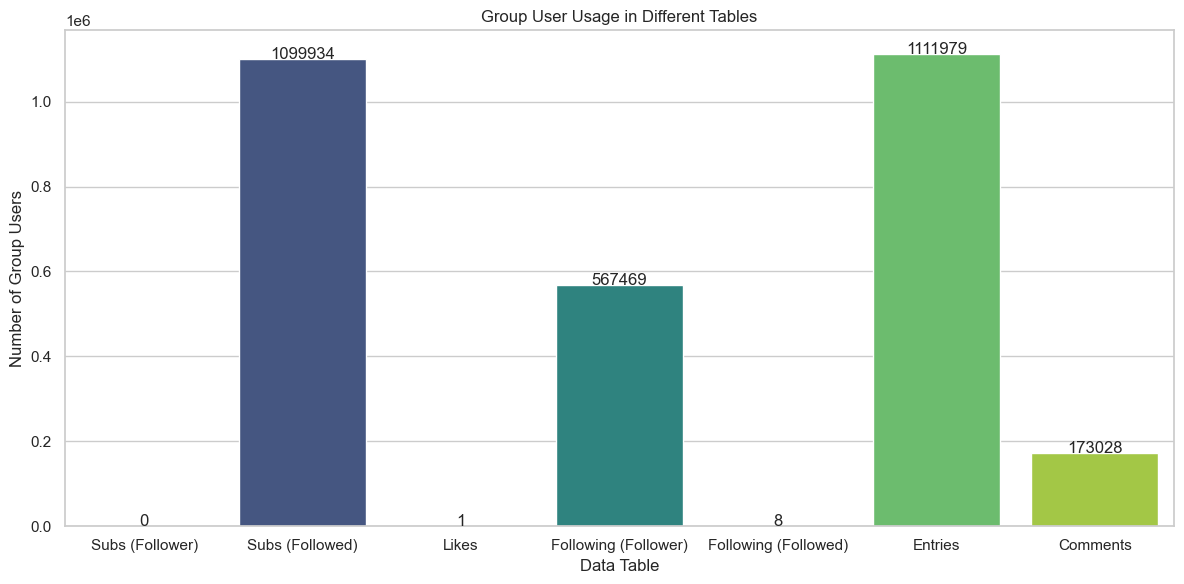

In [12]:
# visualize the group user usage percentages on and count on top of bars
group_user_usage = [len(subs_as_follower), len(subs_as_followed), len(likes_by_group), len(following_as_follower), len(following_as_followed), len(entries_by_group), len(comments_by_group)]
group_user_labels = ['Subs (Follower)', 'Subs (Followed)', 'Likes', 'Following (Follower)', 'Following (Followed)', 'Entries', 'Comments']

plt.figure(figsize=(12, 6))
sns.barplot(x=group_user_labels, y=group_user_usage, palette='viridis')
# add counts on top of bars
for i, v in enumerate(group_user_usage):
    plt.text(i, v + 1, str(v), ha='center')
# Add titles and labels
plt.title('Group User Usage in Different Tables')
plt.ylabel('Number of Group Users')
plt.xlabel('Data Table')

# Adjust layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()


### 5.1 Visualize Missing Data

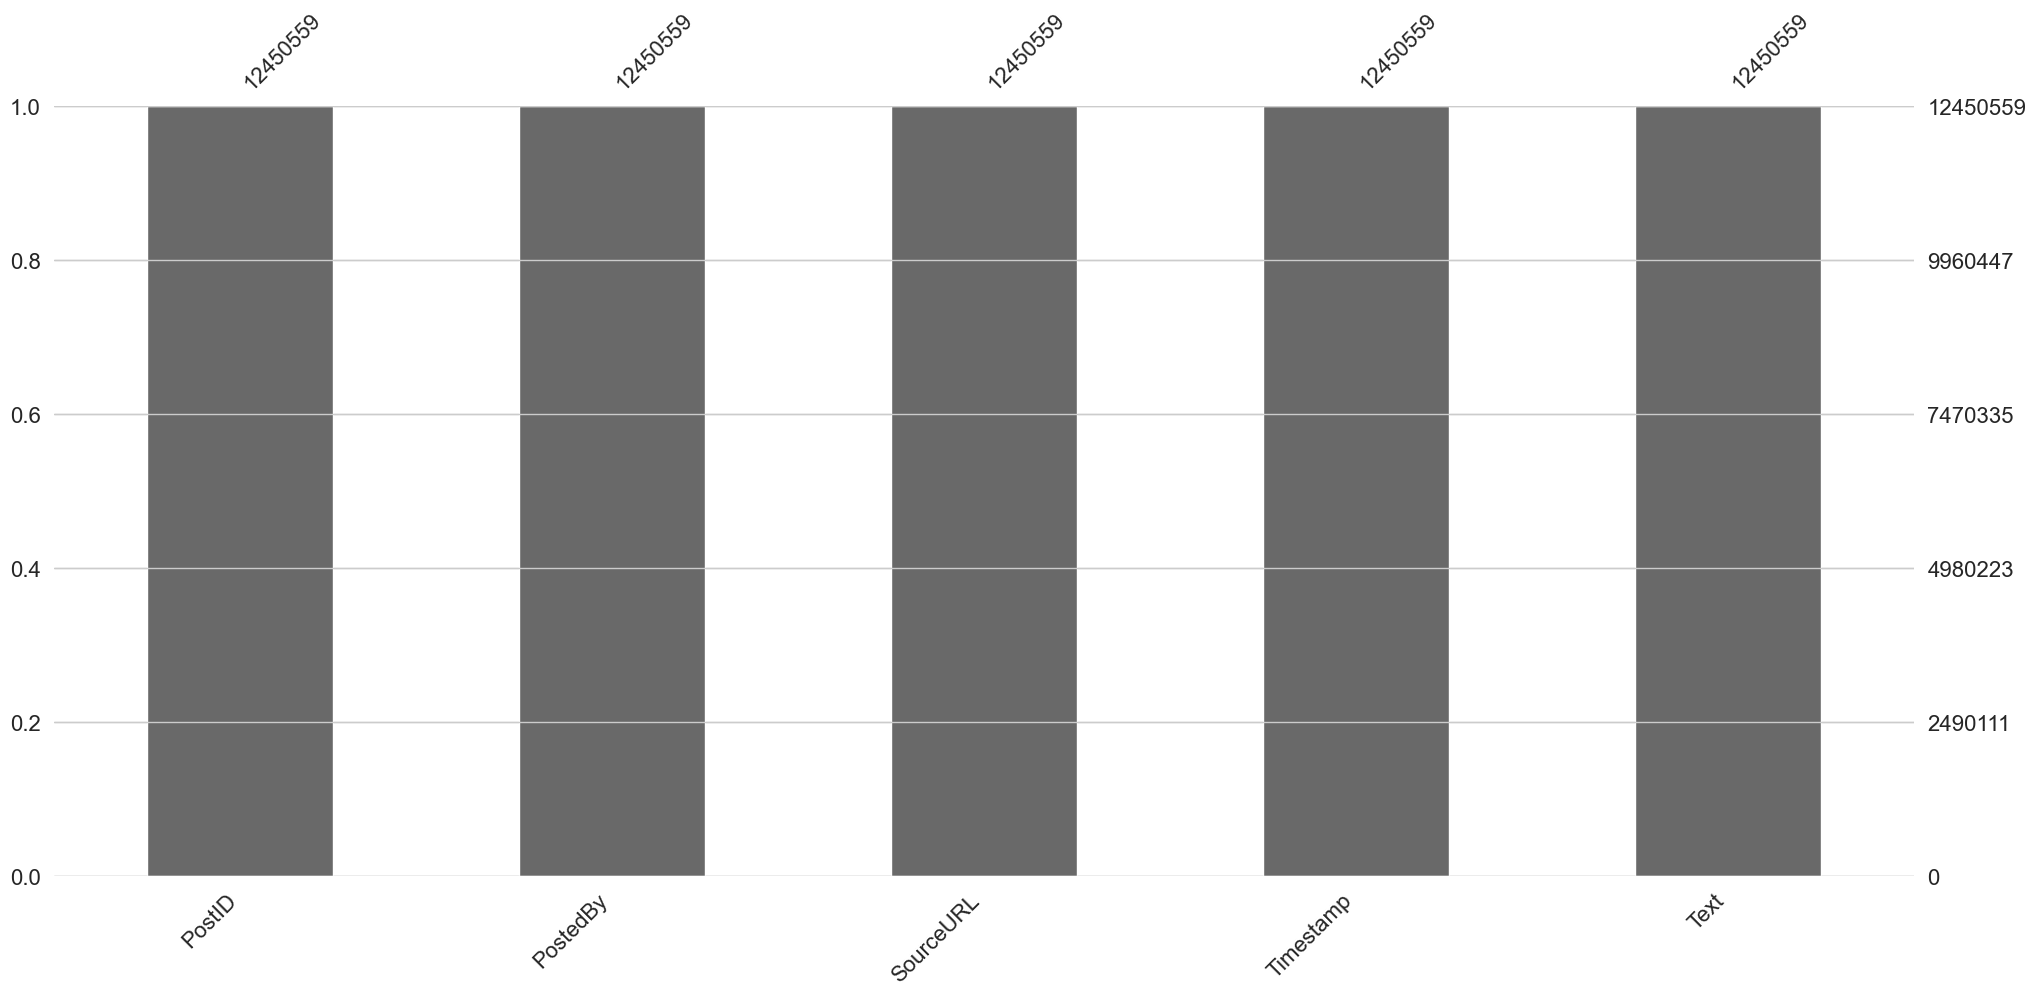

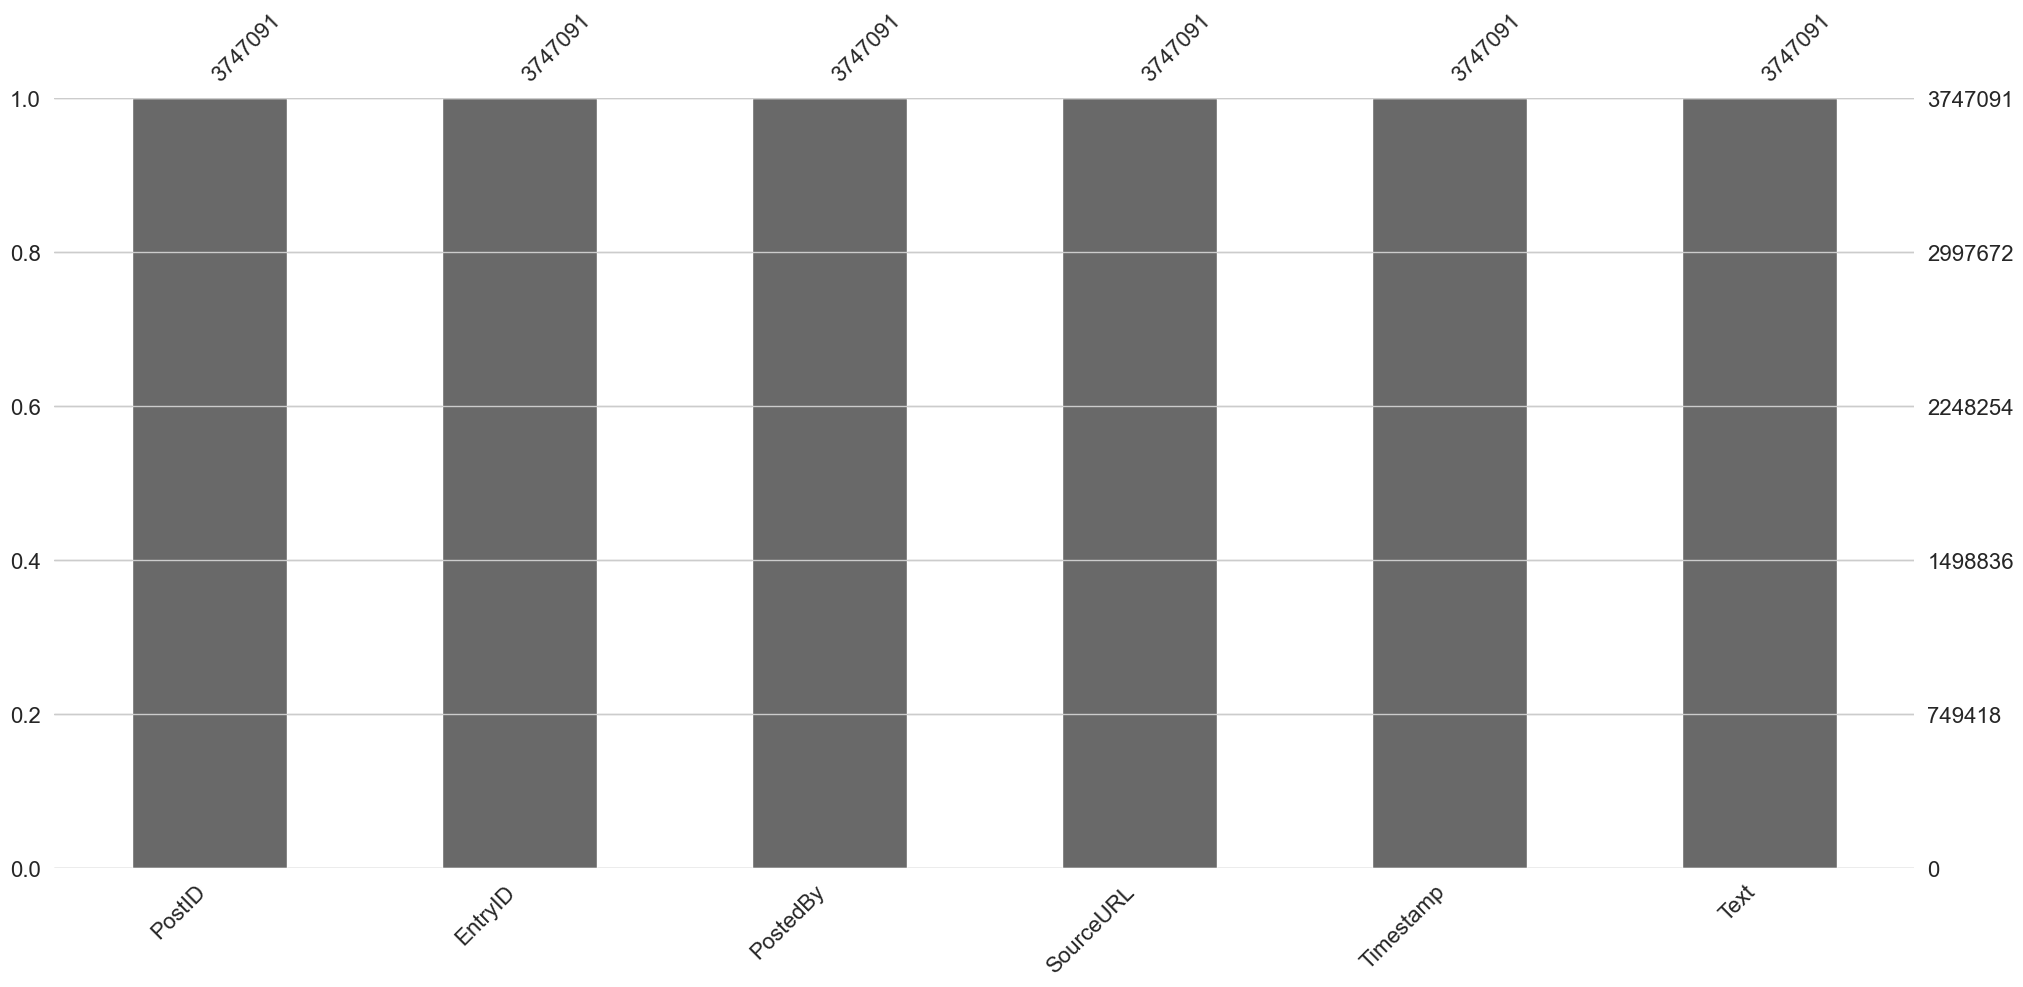

In [13]:
import missingno as msno

# For entries
msno.bar(entries)
plt.show()

# For comments
msno.bar(comments)
plt.show()

## 6. Timestamp Checks

In [14]:
# Ensure timestamps are in correct format
entries['Timestamp'] = pd.to_datetime(entries['Timestamp'], errors='coerce')
comments['Timestamp'] = pd.to_datetime(comments['Timestamp'], errors='coerce')
likes['Timestamp'] = pd.to_datetime(likes['Timestamp'], errors='coerce')
following['Timestamp'] = pd.to_datetime(following['Timestamp'].str.split('.').str[0], errors='coerce')

# Drop rows with missing timestamps
entries.dropna(subset=['Timestamp'], inplace=True)
comments.dropna(subset=['Timestamp'], inplace=True)
likes.dropna(subset=['Timestamp'], inplace=True)
following.dropna(subset=['Timestamp'], inplace=True)

### 6.1 Date Range Checks

In [15]:
# Check date ranges
print(f"Entries date range: {entries['Timestamp'].min()} to {entries['Timestamp'].max()}")
print(f"Comments date range: {comments['Timestamp'].min()} to {comments['Timestamp'].max()}")
print(f"Likes date range: {likes['Timestamp'].min()} to {likes['Timestamp'].max()}")
print(f"Following date range: {following['Timestamp'].min()} to {following['Timestamp'].max()}")

Entries date range: 1970-01-01 00:00:01 to 2010-09-30 23:59:59
Comments date range: 1970-01-01 00:00:01 to 2010-09-30 23:59:58
Likes date range: 2008-03-05 04:36:07 to 2010-10-16 21:42:49
Following date range: 2010-08-01 16:21:37 to 2010-09-30 23:59:12


In [16]:
likes = likes[likes['Timestamp'] >= '2010-01-01']
following = following[following['Timestamp'] >= '2010-01-01']
comments = comments[comments['Timestamp'] >= '2010-01-01']
entries = entries[entries['Timestamp'] >= '2010-01-01']

## Data Consistency Checks

In [17]:
# Check if there are any `PostID` in Likes that refer to entries in the Comments dataset
likes_to_comments = likes['PostID'].isin(comments['EntryID']).sum()
likes_to_entries = likes['PostID'].isin(entries['PostID']).sum()

print(f"Number of PostID references in Likes that match Comments dataset: {likes_to_comments}")
print(f"Number of PostID references in Likes that match Entries dataset: {likes_to_entries}")

# Check if there are any `EntryID` in Comments that refer to entries in the Comments dataset (i.e., comments on comments)
comments_to_comments = comments['EntryID'].isin(comments['PostID']).sum()
comments_to_entries = comments['EntryID'].isin(entries['PostID']).sum()

print(f"Number of EntryID references in Comments that match Comments dataset: {comments_to_comments}")
print(f"Number of EntryID references in Comments that match Entries dataset: {comments_to_entries}")


Number of PostID references in Likes that match Comments dataset: 506539
Number of PostID references in Likes that match Entries dataset: 630915
Number of EntryID references in Comments that match Comments dataset: 0
Number of EntryID references in Comments that match Entries dataset: 3704804


In [18]:
# Run the cleaning function and capture the dropped and remaining counts for visualization
def check_and_clean_user_post_consistency():
    # Define valid IDs
    valid_users = set(users['ID'])
    
    # Clean Entries dataset
    entries_initial_len = len(entries)
    entries_cleaned = entries[
        (entries['PostedBy'].isin(valid_users))
    ]
    entries_dropped = entries_initial_len - len(entries_cleaned)
    
    valid_post_ids = set(entries['PostID'])
    
    # Clean Comments first
    comments_initial_len = len(comments)
    comments_cleaned = comments[
        (comments['PostedBy'].isin(valid_users)) &
        (comments['EntryID'].isin(valid_post_ids))
    ]
    comments_dropped = comments_initial_len - len(comments_cleaned)

    # Update valid_post_ids with valid comments PostIDs
    valid_post_comment_ids = valid_post_ids.union(set(comments_cleaned['PostID']))
    
    # Clean Likes dataset with updated valid_post_comment_ids
    likes_initial_len = len(likes)
    likes_cleaned = likes[
        (likes['userID'].isin(valid_users)) &
        (likes['PostID'].isin(valid_post_comment_ids))
    ]
    likes_dropped = likes_initial_len - len(likes_cleaned)
    
    # Clean Following dataset
    following_initial_len = len(following)
    following_cleaned = following[
        (following['FollowerID'].isin(valid_users)) &
        (following['FollowedID'].isin(valid_users))
    ]
    following_dropped = following_initial_len - len(following_cleaned)
    
    # Clean Subscriptions dataset
    subs_initial_len = len(subs)
    subs_cleaned = subs[
        (subs['FollowerID'].isin(valid_users)) &
        (subs['FollowedID'].isin(valid_users))
    ]
    subs_dropped = subs_initial_len - len(subs_cleaned)


    # Capture the numbers for visualization
    dropped_counts = {
        'Comments': comments_dropped,
        'Likes': likes_dropped,
        'Following': following_dropped,
        'Subscriptions': subs_dropped,
        'Entries': entries_dropped
    }
    remaining_counts = {
        'Comments': len(comments_cleaned),
        'Likes': len(likes_cleaned),
        'Following': len(following_cleaned),
        'Subscriptions': len(subs_cleaned),
        'Entries': len(entries_cleaned)
    }

    return comments_cleaned, likes_cleaned, following_cleaned, subs_cleaned, entries_cleaned, dropped_counts, remaining_counts

# Call the function to get cleaned datasets and the counts
comments, likes, following, subs, entries, dropped_counts, remaining_counts = check_and_clean_user_post_consistency()


/tmp/ipykernel_9196/2148195703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(dropped_counts.keys()), y=list(dropped_counts.values()), palette='viridis')


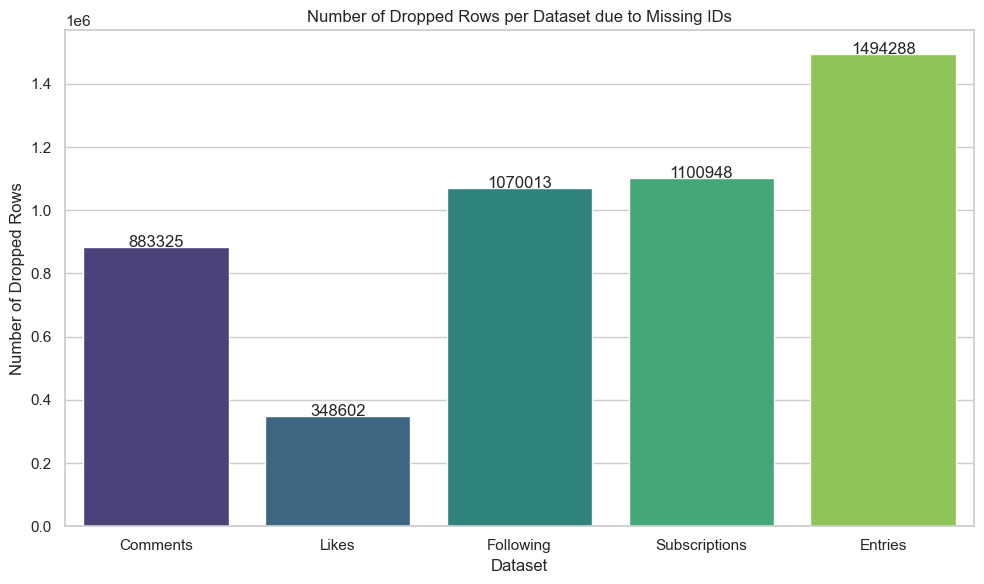

/tmp/ipykernel_9196/2148195703.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(remaining_counts.keys()), y=list(remaining_counts.values()), palette='coolwarm')


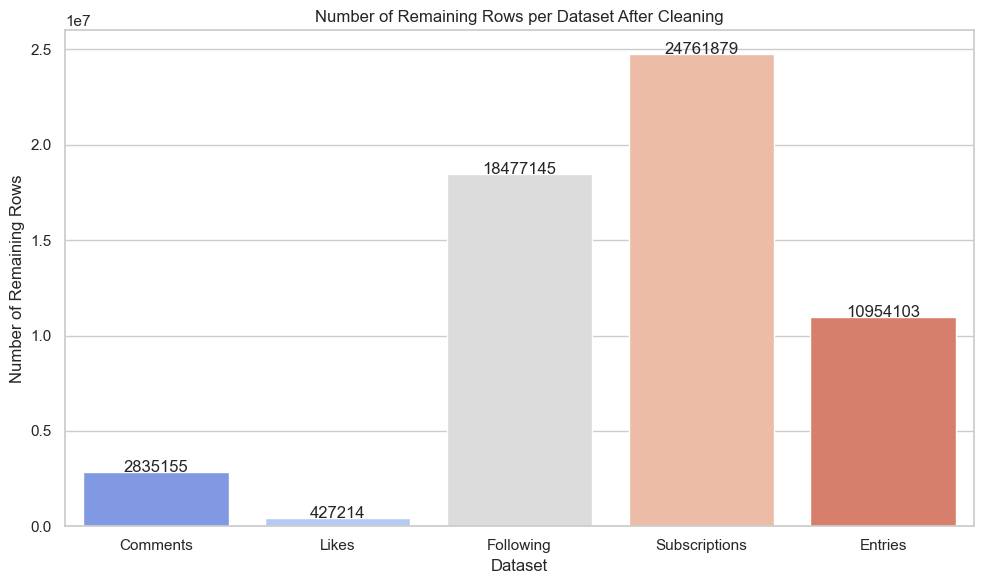

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Dropped Rows
plt.figure(figsize=(10, 6))
sns.barplot(x=list(dropped_counts.keys()), y=list(dropped_counts.values()), palette='viridis')
plt.title('Number of Dropped Rows per Dataset due to Missing IDs')
plt.xlabel('Dataset')
plt.ylabel('Number of Dropped Rows')
# Add counts on top of bars
for i, v in enumerate(dropped_counts.values()):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.tight_layout()
plt.show()

# Visualization 2: Remaining Rows
plt.figure(figsize=(10, 6))
sns.barplot(x=list(remaining_counts.keys()), y=list(remaining_counts.values()), palette='coolwarm')
plt.title('Number of Remaining Rows per Dataset After Cleaning')
plt.xlabel('Dataset')
plt.ylabel('Number of Remaining Rows')
# Add counts on top of bars
for i, v in enumerate(remaining_counts.values()):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.tight_layout()
plt.show()


## 7. Data Visualization

### 7.1 Distribution of Posts Over Time

Timestamp
2010    10954103
Name: count, dtype: int64


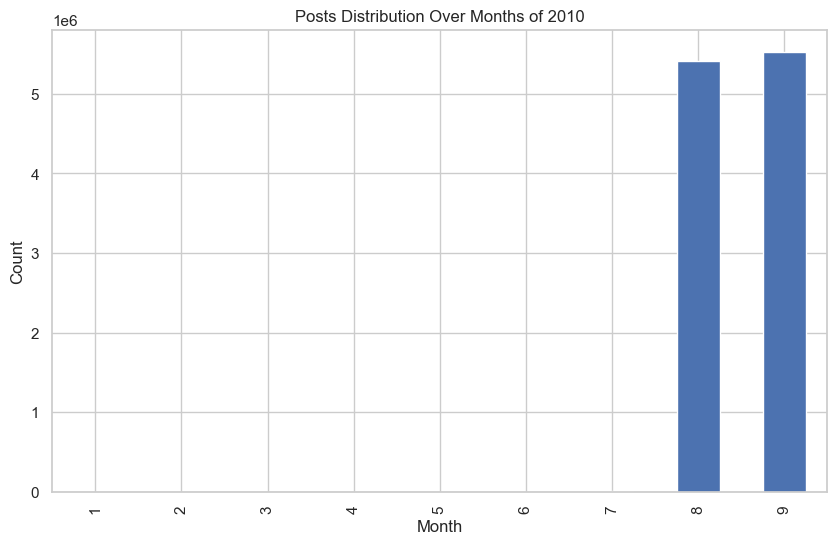

In [20]:
# print posts per year
print(entries['Timestamp'].dt.year.value_counts().sort_index())

# Plot distribution of posts over months of 2010 map int to month name,
plt.figure(figsize=(10, 6))
entries['Timestamp'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Posts Distribution Over Months of 2010')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()





### 7.2 Top Active Users

/tmp/ipykernel_9196/1839795540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')


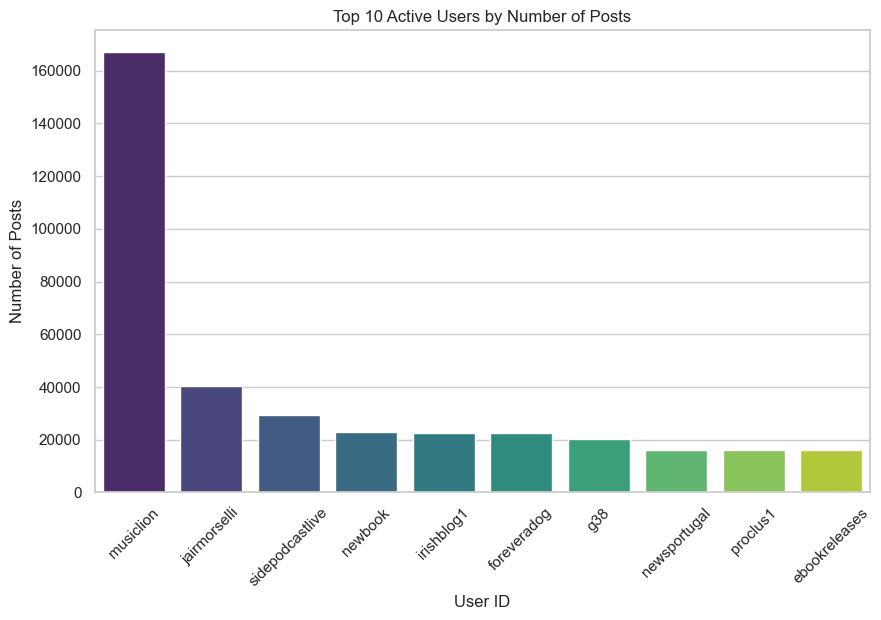

In [21]:
# Top 10 users by number of posts
top_users = entries['PostedBy'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.title('Top 10 Active Users by Number of Posts')
plt.xlabel('User ID')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

### 7.3 Network Visualization (Sample)

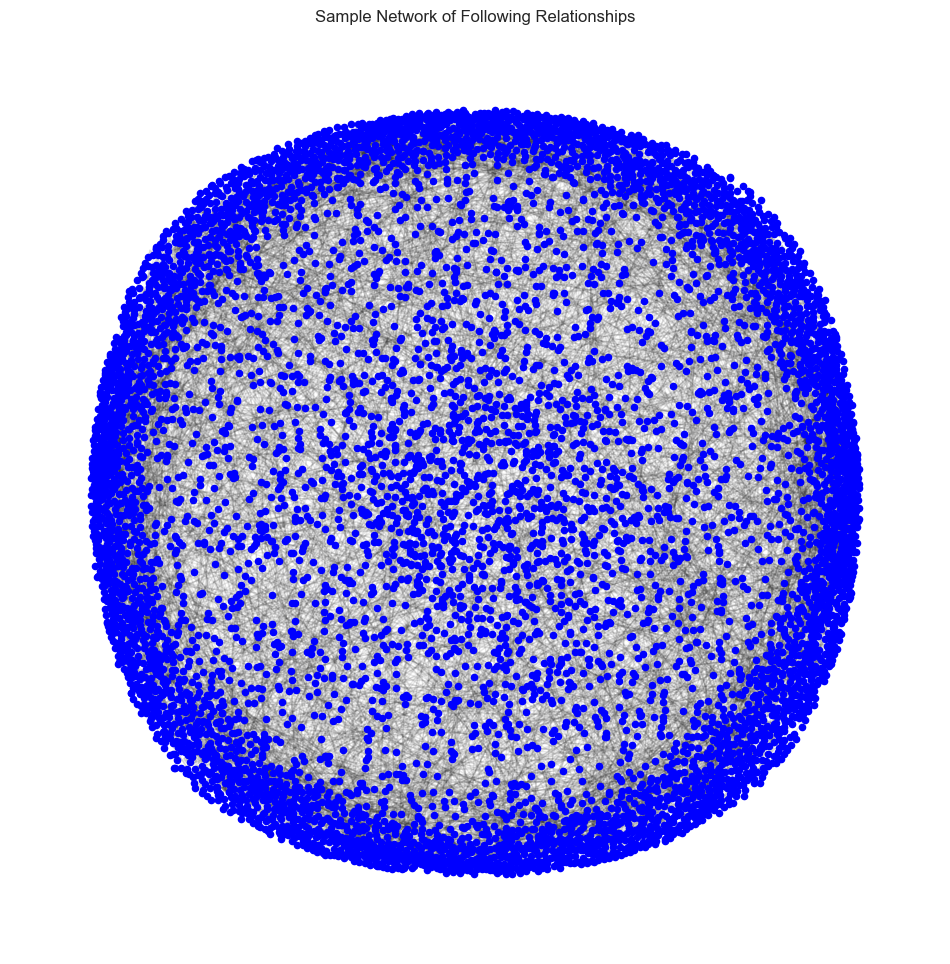

In [22]:
# Sample network visualization
import networkx as nx

# Create a sample of the following relationships
sample_following = following.sample(n=5000, random_state=42)

# Create a directed graph
G = nx.from_pandas_edgelist(sample_following, source='FollowerID', target='FollowedID', create_using=nx.DiGraph())

# Draw the graph
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.title('Sample Network of Following Relationships')
plt.axis('off')
plt.show()

## 8. Final Cleaned Datasets

In [23]:
# Display the shape of each cleaned dataset
print(f"Users dataset shape: {users.shape}")
print(f"Entries dataset shape: {entries.shape}")
print(f"Comments dataset shape: {comments.shape}")
print(f"Likes dataset shape: {likes.shape}")
print(f"Subscriptions dataset shape: {subs.shape}")
print(f"Following dataset shape: {following.shape}")
print(f"Services dataset shape: {services.shape}")

Users dataset shape: (645414, 4)
Entries dataset shape: (10954103, 5)
Comments dataset shape: (2835155, 6)
Likes dataset shape: (427214, 3)
Subscriptions dataset shape: (24761879, 2)
Following dataset shape: (18477145, 3)
Services dataset shape: (1206677, 3)


In [24]:
# display head of each cleaned dataset
for name, df in datasets.items():
    print(f"\n{name} dataset:\n")
    display(df.head())


Users dataset:



,ID,Type,Name,Description
0,2gwsk,user,Ming Quek,No Description
1,iroach,user,Isaac Roach,No Description
2,tonybraun,user,Tony Braun,No Description
3,junknajidyahoocom1,user,Junknajid Yahoocom,No Description
4,spaceastronautics,user,Space & Astronautics News,"NASA, ESA, NOAA, USGS, astronomy, space, weath..."



Subs dataset:



,FollowerID,FollowedID
0,seoptimise,2gwsk
1,xahac,2gwsk
2,kmorrison,iroach
3,seoptimise,iroach
4,skyje,iroach



Services dataset:



,UserID,ServiceID,ServiceURL
0,2gwsk,blog,http://en.wikipedia.org/wiki/Blog
1,2gwsk,twitter,http://twitter.com/
2,iroach,facebook,http://www.facebook.com/
3,iroach,googletalk,http://talk.google.com/
4,iroach,twitter,http://twitter.com/



Likes dataset:



,userID,PostID,Timestamp
0,yasinde,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-04-28 07:17:43
1,socialnewsturkey,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 20:10:02
2,janzu,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 19:50:57
3,mugecerman,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 19:18:38
4,miocaro,e/2d4fcaed2d2a4ac1a36571b66da3f16c,2010-03-02 17:31:31



Following dataset:



,FollowerID,FollowedID,Timestamp
0,njsinc4el,brendafranzo,2010-08-01 16:21:37
1,njsinc4el,praguebob,2010-08-01 16:21:37
2,zachhwilliams,hungheroic,2010-08-01 16:21:37
3,zachhwilliams,ridwan2906,2010-08-01 16:21:37
4,zachhwilliams,nickcodipietro,2010-08-01 16:21:37



Comments dataset:



,PostID,EntryID,PostedBy,SourceURL,Timestamp,Text
0,e/ed12adf025b5491da54c4ff2c8c5377a/c/c2dbc8151...,e/ed12adf025b5491da54c4ff2c8c5377a,koenigdublin,Unknown URL,2010-08-06 15:06:32,В начале 20 века было противостояние идеологи...
1,e/7f6fb13b5a99449bb9dcbb3f8693be73/c/7477fb677...,e/7f6fb13b5a99449bb9dcbb3f8693be73,ilportalinux,Unknown URL,2010-08-06 15:06:32,sofferenza? :D
2,e/624ca9226b6526ebdb69f9b46df482c7/c/32c6bf5bc...,e/624ca9226b6526ebdb69f9b46df482c7,guardianuk,Unknown URL,2010-08-06 14:45:07,Reel Review video: Catherine Shoard defends Kn...
3,e/2fdf59e075094fe1847137af34eda0f7/c/eb22afe81...,e/2fdf59e075094fe1847137af34eda0f7,nahi,http://m.ctor.org/f2p/,2010-08-06 15:06:32,VMWareじゃなくてVMwareね。
4,e/4d8de05f989d43a4b90bfbfc59751e1c/c/d472f7b81...,e/4d8de05f989d43a4b90bfbfc59751e1c,miocaro,Unknown URL,2010-08-06 15:06:31,Anıl havuzdan uzak dur. Sen evde olacaksın :)



Entries dataset:



,PostID,PostedBy,SourceURL,Timestamp,Text
0,e/29af803d670fb8d67692095f3ee623e6,newsroom1,http://www.ottawacitizen.com/index.html,2010-08-02 18:43:10,RIM 'will not compromise' BlackBerry security ...
1,e/9c8413a376bec6389be4d46d0812c2bb,mehmetinnet,http://www.mehmetin.net,2010-08-02 19:15:52,Fethullah Gülen: Referandum siyasî olarak görü...
2,e/2d658d97842a466a9513f587f85b0e59,mehmetergin,http://www.mehmetin.net/,2010-08-02 19:15:52,Fethullah Gülen: Referandum siyasî olarak görü...
3,e/b269ab5d56be4e5e90c1954ecc1ef63a,afriki,Unknown URL,2010-08-02 16:37:57,Мне тут недавно один дизайнер сказал: «Ну прот...
4,e/74f0a50c374a4ad6bddcbcc60c60cad9,hamsafar,Unknown URL,2010-08-02 18:54:39,عرض سلام و خسته نباشيد:)


## 9. Save Preprocessed Data

In [25]:
# Save cleaned datasets
users.to_parquet('processed_data/users_cleaned.parquet', index=False)
subs.to_parquet('processed_data/subs_cleaned.parquet', index=False)
services.to_parquet('processed_data/services_cleaned.parquet', index=False)
likes.to_parquet('processed_data/likes_cleaned.parquet', index=False)
following.to_parquet('processed_data/following_cleaned.parquet', index=False)
comments.to_parquet('processed_data/comments_cleaned.parquet', index=False)
entries.to_parquet('processed_data/entries_cleaned.parquet', index=False)
